# ML

In [ ]:
# Load packages
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_clear = pd.read_csv('/content/drive/MyDrive/OTO_DOM_REGRESSION/numericML_data.csv', sep=';')

In [ ]:
df_clear = df_clear.drop(columns=['Unnamed: 0'])

In [ ]:
# Histogram (price)
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of flats')

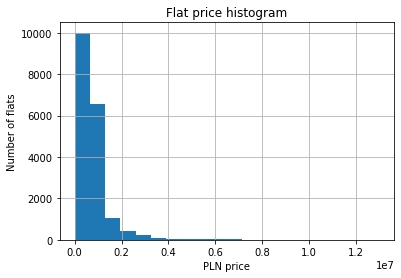

In [ ]:
df_clear['Cena'].hist(bins = 20)
plt.title('Flat price histogram')
plt.xlabel('PLN price')
plt.ylabel('Number of flats')

In [ ]:
def rm_sigma(dataFrame, col_name = 'Cena', sigma = 1.2):
    mean = dataFrame[col_name].mean()
    std = dataFrame[col_name].std()
    sigma_thresh_up = mean + sigma * std
    sigma_thresh_down = mean - sigma * std
    # Remove outlayers
    dataFrame = dataFrame[(dataFrame[col_name] < sigma_thresh_up) & (dataFrame[col_name] > sigma_thresh_down)]
    
    return dataFrame

In [ ]:
df_test = rm_sigma(df_clear, col_name='Cena', sigma=1.2).reset_index(drop=True)

In [ ]:
df_test = rm_sigma(df_test, col_name='Cena', sigma=1.2).reset_index(drop=True)

Text(0, 0.5, 'Number of flats')

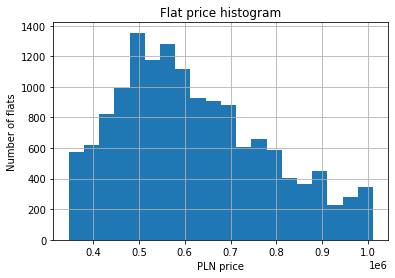

In [ ]:
# New histogram
df_test['Cena'].hist(bins = 20)
plt.title('Flat price histogram')
plt.xlabel('PLN price')
plt.ylabel('Number of flats')

In [ ]:
df_test.head()

,Cena,Powierzchnia,Liczba pokoi,Rynek,Title_len,numer_pietra,liczba_pieter,Forma własności_pełna własność,Forma własności_spółdzielcze wł. z KW,Forma własności_spółdzielcze własnościowe,...,dodatkowe_pom. użytkowe,Materiał budynku_beton,Materiał budynku_beton komórkowy,Materiał budynku_brak informacji,Materiał budynku_cegła,Materiał budynku_inne,Materiał budynku_pustak,Materiał budynku_silikat,Materiał budynku_wielka płyta,Materiał budynku_żelbet
0,435000.0,46.00,2.0,0,46,2.0,3.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,531962.0,38.00,2.0,0,49,3.0,3.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,429000.0,36.00,2.0,0,31,8.0,10.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,514000.0,37.24,2.0,0,48,4.0,10.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,799000.0,71.40,4.0,0,49,3.0,3.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


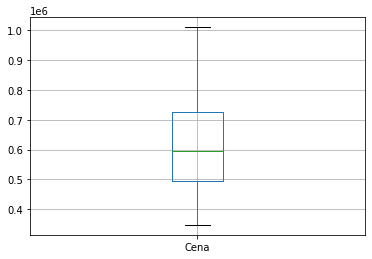

In [ ]:
# Box plot (wykres pudelkowy)
df_test.boxplot(column = 'Cena')

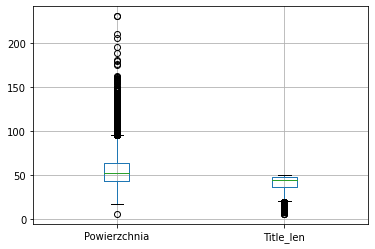

In [ ]:
df_test.boxplot(column = ['Powierzchnia', 'Title_len'])

In [ ]:
# Correleation, removing of correlated features

In [ ]:
df_corr = df_test.drop(columns=['Cena'])
corr = df_corr.corr()

In [ ]:
import seaborn as sns

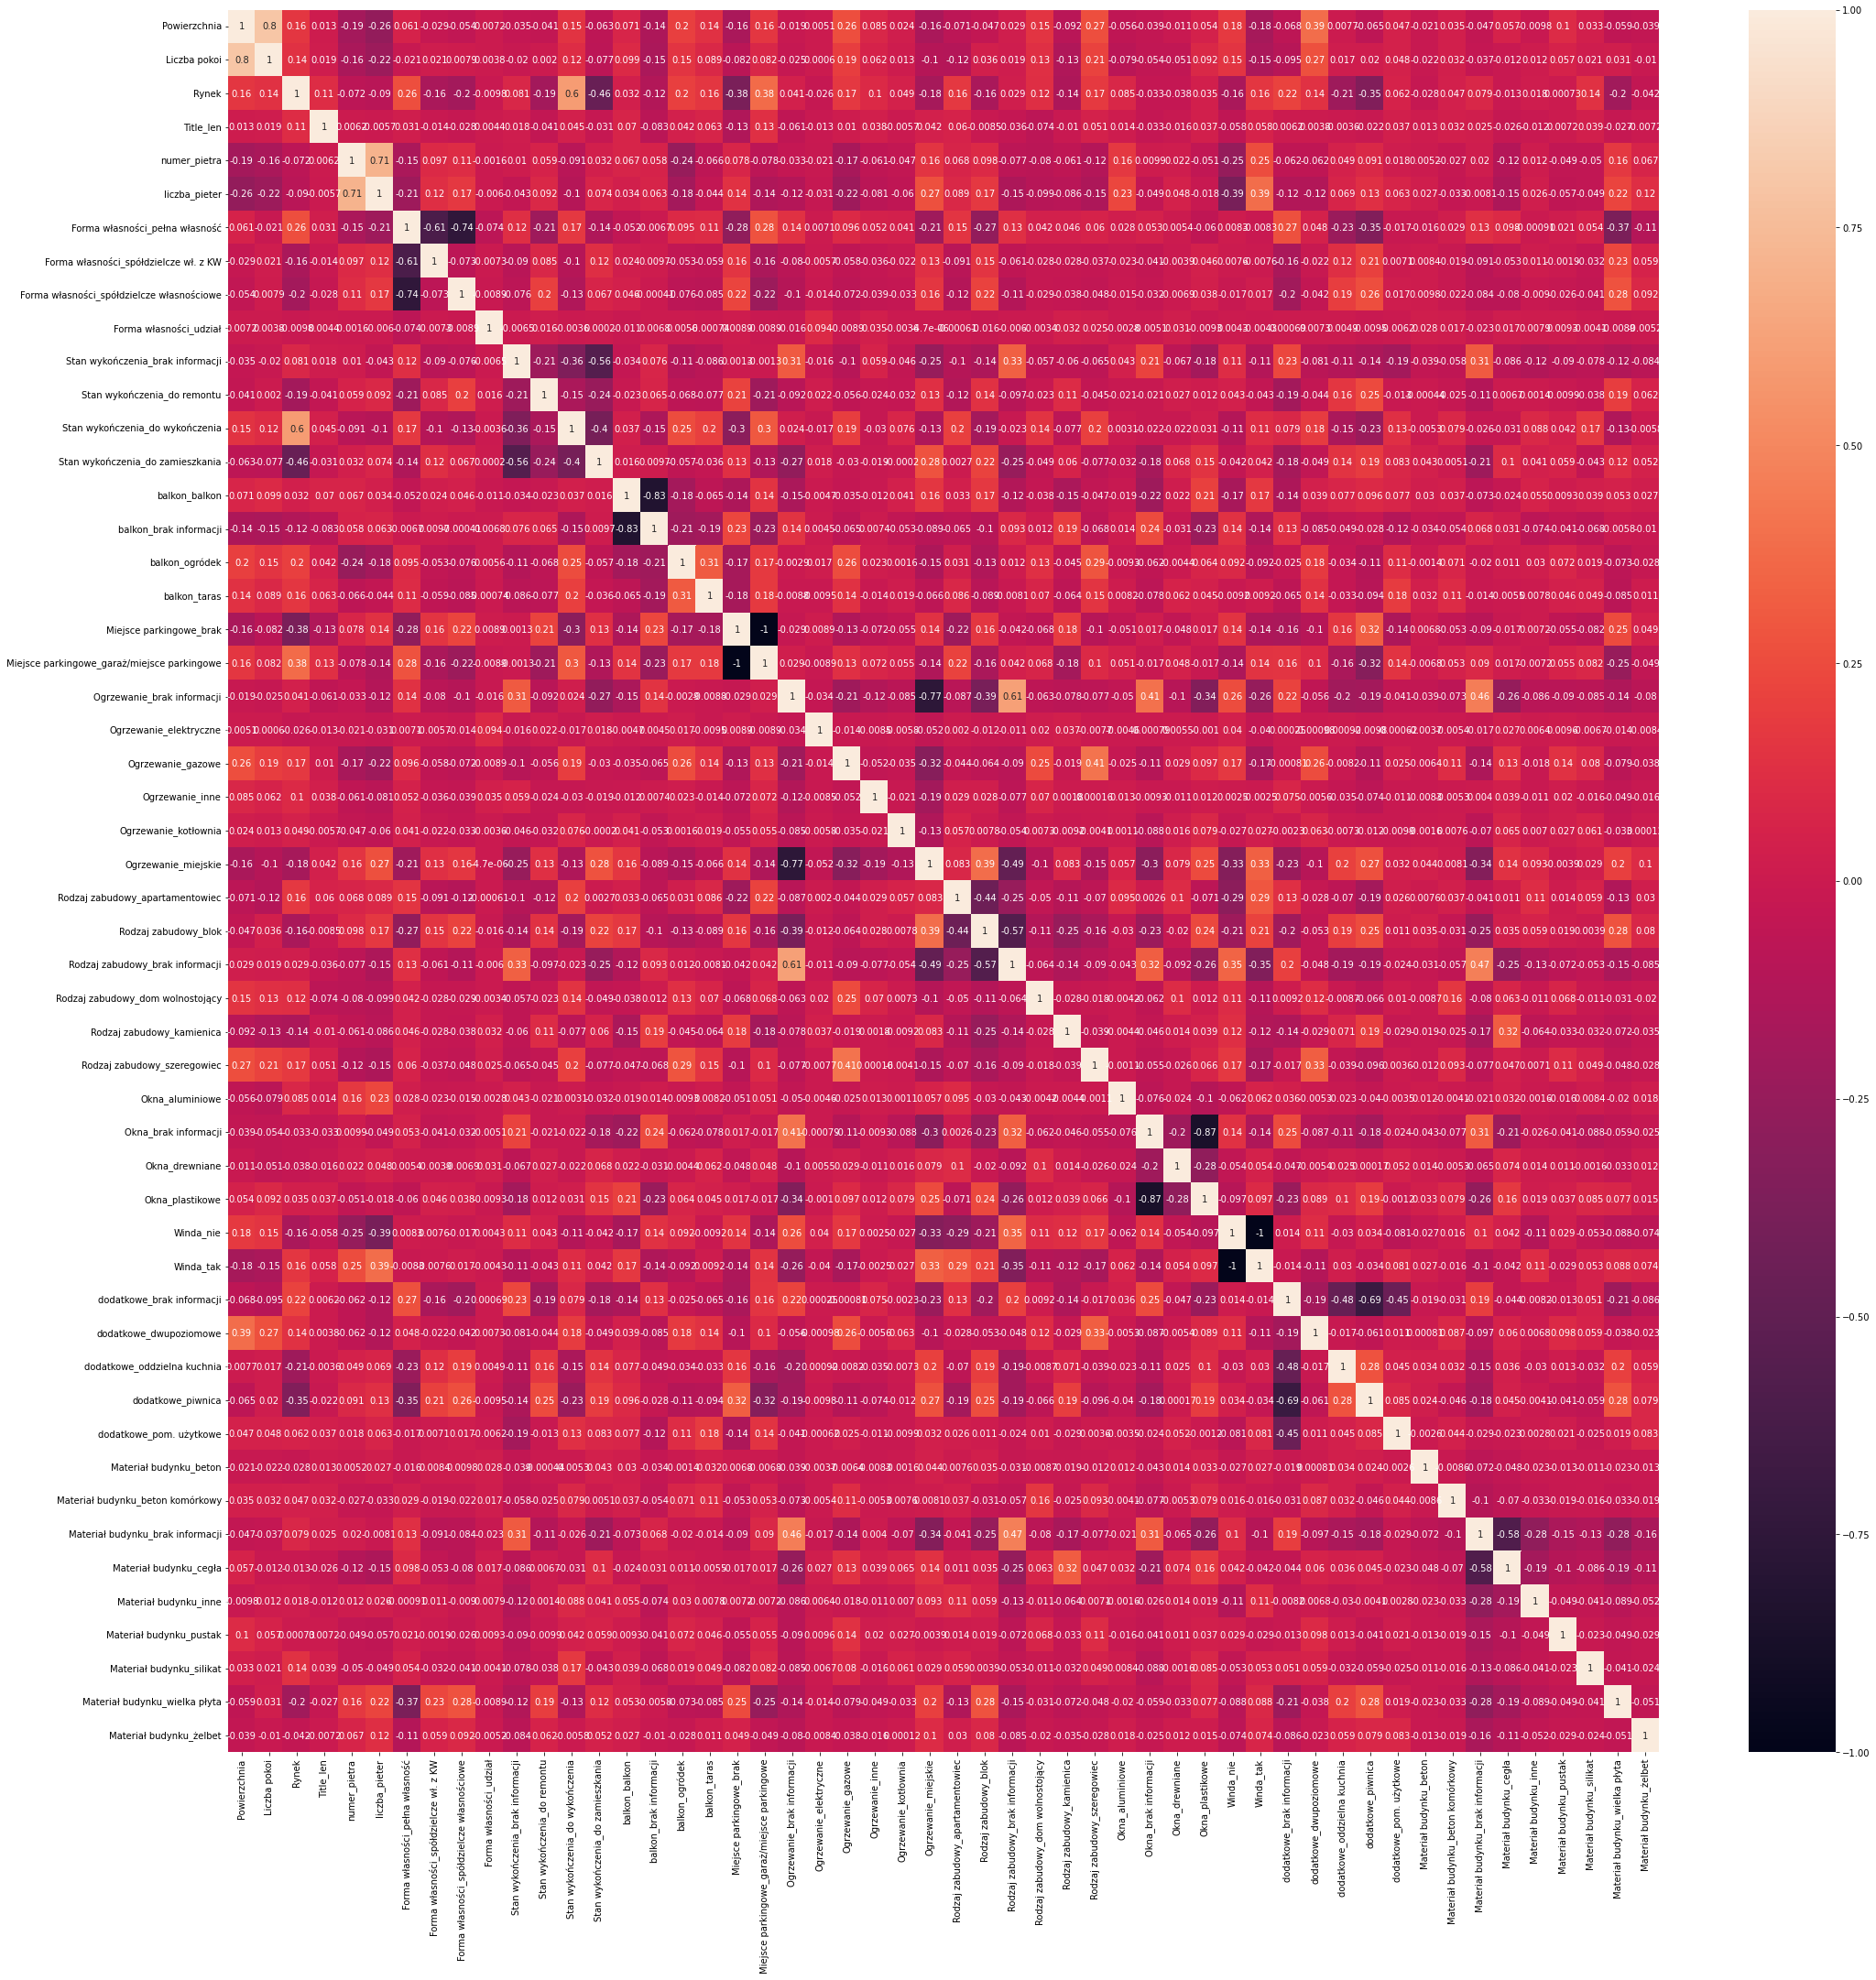

In [ ]:
plt.figure(figsize=(35,35))
sns.heatmap(corr, annot=True)

In [ ]:
# corr abs calculation
corr_matrix = df_corr.corr().abs()

In [ ]:
# Max correlation threshold
thresh = 0.55

In [ ]:
# Upper tridiagonal matrix
upper_trid_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
upper_trid_corr

,Powierzchnia,Liczba pokoi,Rynek,Title_len,numer_pietra,liczba_pieter,Forma własności_pełna własność,Forma własności_spółdzielcze wł. z KW,Forma własności_spółdzielcze własnościowe,Forma własności_udział,...,dodatkowe_pom. użytkowe,Materiał budynku_beton,Materiał budynku_beton komórkowy,Materiał budynku_brak informacji,Materiał budynku_cegła,Materiał budynku_inne,Materiał budynku_pustak,Materiał budynku_silikat,Materiał budynku_wielka płyta,Materiał budynku_żelbet
Powierzchnia,NaN,0.801625,0.160742,0.012999,0.185895,0.262171,0.061286,0.028507,0.054187,0.007195,...,0.047112,0.021334,0.035242,0.046775,0.056727,0.009815,0.102063,0.033120,0.058951,0.039269
Liczba pokoi,NaN,NaN,0.135582,0.018855,0.161721,0.219600,0.020558,0.020937,0.007910,0.003833,...,0.047764,0.021602,0.032126,0.037213,0.011882,0.011709,0.057412,0.020747,0.030853,0.010340
Rynek,NaN,NaN,NaN,0.113950,0.072018,0.090229,0.262420,0.160552,0.195160,0.009805,...,0.061729,0.027679,0.046862,0.079295,0.013033,0.018035,0.000726,0.137700,0.195795,0.041932
Title_len,NaN,NaN,NaN,NaN,0.006214,0.005743,0.031038,0.014260,0.027678,0.004436,...,0.036663,0.013454,0.032179,0.025392,0.026071,0.012326,0.007152,0.038658,0.027035,0.007207
numer_pietra,NaN,NaN,NaN,NaN,NaN,0.709129,0.153395,0.097142,0.112100,0.001566,...,0.018122,0.005196,0.026915,0.019808,0.116050,0.011940,0.048774,0.049538,0.164083,0.067255
liczba_pieter,NaN,NaN,NaN,NaN,NaN,NaN,0.212154,0.121268,0.166483,0.005987,...,0.062572,0.027011,0.033489,0.008053,0.146920,0.026459,0.056634,0.049069,0.219697,0.119896
Forma własności_pełna własność,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.608739,0.742238,0.074444,...,0.017391,0.015717,0.028894,0.129318,0.097784,0.000914,0.021211,0.054117,0.374198,0.111205
Forma własności_spółdzielcze wł. z KW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072814,0.007303,...,0.007069,0.008368,0.019347,0.091081,0.053340,0.011000,0.001904,0.031641,0.229209,0.058623
Forma własności_spółdzielcze własnościowe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008905,...,0.016694,0.009781,0.022098,0.084084,0.080467,0.008977,0.026202,0.041252,0.280556,0.091652
Forma własności_udział,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006224,0.027707,0.017402,0.023242,0.017252,0.007906,0.009262,0.004137,0.008884,0.005174


In [ ]:
# Get trid columns
trid_columns = upper_trid_corr.columns

In [ ]:
# Get high correlated features
high_corr_features = [column for column in trid_columns if any(upper_trid_corr[column] > thresh)]

In [ ]:
len(high_corr_features)

14

In [ ]:
high_corr_features

['Liczba pokoi',
 'liczba_pieter',
 'Forma własności_spółdzielcze wł. z KW',
 'Forma własności_spółdzielcze własnościowe',
 'Stan wykończenia_do wykończenia',
 'Stan wykończenia_do zamieszkania',
 'balkon_brak informacji',
 'Miejsce parkingowe_garaż/miejsce parkingowe',
 'Ogrzewanie_miejskie',
 'Rodzaj zabudowy_brak informacji',
 'Okna_plastikowe',
 'Winda_tak',
 'dodatkowe_piwnica',
 'Materiał budynku_cegła']

In [ ]:
# No correlation dataframe
df_noCorr = df_corr.drop(columns=high_corr_features)

In [ ]:
df_noCorr

,Powierzchnia,Rynek,Title_len,numer_pietra,Forma własności_pełna własność,Forma własności_udział,Stan wykończenia_brak informacji,Stan wykończenia_do remontu,balkon_balkon,balkon_ogródek,...,dodatkowe_oddzielna kuchnia,dodatkowe_pom. użytkowe,Materiał budynku_beton,Materiał budynku_beton komórkowy,Materiał budynku_brak informacji,Materiał budynku_inne,Materiał budynku_pustak,Materiał budynku_silikat,Materiał budynku_wielka płyta,Materiał budynku_żelbet
0,46.00,0,46,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,38.00,0,49,3.0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,36.00,0,31,8.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,37.24,0,48,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,71.40,0,49,3.0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14564,40.00,0,27,4.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14565,64.45,0,49,0.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14566,111.00,1,50,1.0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14567,94.79,1,50,0.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Simple corr calculation
df_noCorr['Powierzchnia'].corr(df_noCorr['Title_len'])

0.012999047599147023

In [ ]:
# Create X an Y arrays
X = df_noCorr
Y = df_test['Cena']

In [ ]:
X.shape

(14569, 38)

In [ ]:
Y.shape

(14569,)

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Train - test, 0.8-0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=77)

In [ ]:
# Create a scaler
min_max_scaler = MinMaxScaler()

In [ ]:
# Normlaize data with min_max_scaler
x_train_norm = min_max_scaler.fit_transform(X_train)
x_test_norm = min_max_scaler.transform(X_test)

In [ ]:
# 1. Multiple Regression (Regresja wieloraka)
from sklearn.linear_model import LinearRegression

sklearn_linear = LinearRegression()
sklearn_linear.fit(x_train_norm, y_train)

LinearRegression()

In [ ]:
sklearn_linear.coef_

array([ 1.16773378e+06, -4.96837450e+04,  2.11654688e+04,  2.25113305e+05,
        5.01656031e+03, -6.54245421e+04, -1.33820215e+03, -3.16027879e+04,
       -1.95387490e+04,  9.04252345e+02,  7.92182349e+03, -1.50385231e+04,
       -1.99626080e+04, -7.53234005e+04, -7.49705856e+04, -4.11825812e+04,
       -8.17261093e+04,  6.69449059e+04, -4.24781087e+03, -4.92797562e+04,
        1.02464162e+05, -6.79594396e+04,  1.15914522e+05,  1.72865988e+04,
        6.96872478e+04, -4.41323187e+04, -1.55273755e+04, -6.43214959e+04,
       -2.05973658e+04, -3.48789201e+02, -1.22249355e+04,  1.77159010e+04,
        1.08236406e+04,  7.28359274e+03, -2.44701359e+04, -2.21352449e+04,
       -3.82515405e+04, -1.28199303e+04])

In [ ]:
sklearn_linear.intercept_

377039.2611050806

In [ ]:
# Test model 
y_reg_pred_train = sklearn_linear.predict(x_train_norm) 
y_reg_pred_test = sklearn_linear.predict(x_test_norm) 

Text(0.5, 1.0, 'Training data')

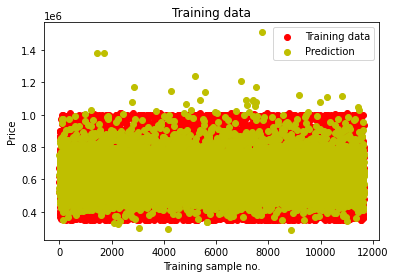

In [ ]:
plt.scatter(list(range(len(y_train))), y_train, c='r')
plt.scatter(list(range(len(y_reg_pred_train))), y_reg_pred_train, c='y')
plt.legend(['Training data', 'Prediction'])
plt.xlabel('Training sample no.')
plt.ylabel('Price')
plt.title('Training data')

Text(0.5, 1.0, 'Test data')

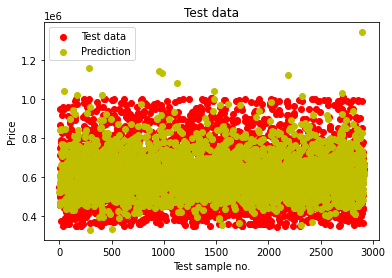

In [ ]:
plt.scatter(list(range(len(y_test))), y_test, c='r')
plt.scatter(list(range(len(y_reg_pred_test))), y_reg_pred_test, c='y')
plt.legend(['Test data', 'Prediction'])
plt.xlabel('Test sample no.')
plt.ylabel('Price')
plt.title('Test data')

In [ ]:
from sklearn.metrics import mean_squared_error

print('Regression, train data RMSE: %.2f' % mean_squared_error(y_train, y_reg_pred_train, squared=False))
print('Regression, test data RMSE: %.2f' % mean_squared_error(y_test, y_reg_pred_test, squared=False))

Regression, train data RMSE: 122951.26
Regression, test data RMSE: 122535.02


In [ ]:
#2. Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_regr = DecisionTreeRegressor(max_depth=10)

tree_regr.fit(x_train_norm, y_train)

DecisionTreeRegressor(max_depth=10)

In [ ]:
# Predictions
y_tree_pred_train = tree_regr.predict(x_train_norm)
y_tree_pred_test = tree_regr.predict(x_test_norm)

In [ ]:
print('Tree Regressor, train data RMSE: %.2f' % mean_squared_error(y_train, y_tree_pred_train, squared=False))
print('Tree Regressor, test data RMSE: %.2f' % mean_squared_error(y_test, y_tree_pred_test, squared=False))

Tree Regressor, train data RMSE: 100388.72
Tree Regressor, test data RMSE: 120026.11


Text(0.5, 1.0, 'Test data')

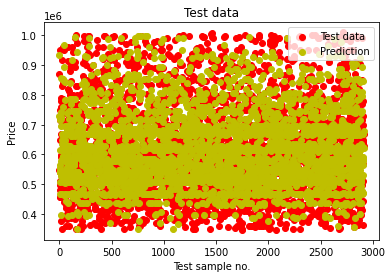

In [ ]:
plt.scatter(list(range(len(y_test))), y_test, c='r')
plt.scatter(list(range(len(y_tree_pred_test))), y_tree_pred_test, c='y')
plt.legend(['Test data', 'Prediction'])
plt.xlabel('Test sample no.')
plt.ylabel('Price')
plt.title('Test data')

In [ ]:
# SVR
from sklearn.svm import SVR

In [ ]:
svr_poly = SVR(kernel='poly', C=100, degree=20)

In [ ]:
svr_poly.fit(x_train_norm, y_train)

SVR(C=100, degree=20, kernel='poly')

In [ ]:
# Predictions
y_svr_pred_train = svr_poly.predict(x_train_norm)
y_svr_pred_test = svr_poly.predict(x_test_norm)

In [ ]:
print('SVR Regressor, train data RMSE: %.2f' % mean_squared_error(y_train, y_svr_pred_train, squared=False))
print('SVR Regressor, test data RMSE: %.2f' % mean_squared_error(y_test, y_svr_pred_test, squared=False))

SVR Regressor, train data RMSE: 135319.07
SVR Regressor, test data RMSE: 154557.47


Text(0.5, 1.0, 'Test data')

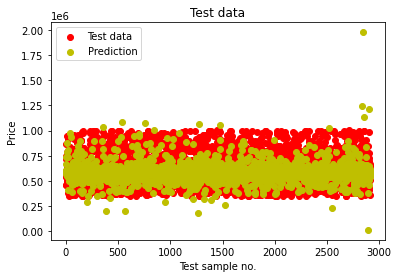

In [ ]:
plt.scatter(list(range(len(y_test))), y_test, c='r')
plt.scatter(list(range(len(y_svr_pred_test))), y_svr_pred_test, c='y')
plt.legend(['Test data', 'Prediction'])
plt.xlabel('Test sample no.')
plt.ylabel('Price')
plt.title('Test data')

In [ ]:
#4. Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_regr = RandomForestRegressor(n_estimators=300)
forest_regr.fit(x_train_norm, y_train)

RandomForestRegressor(n_estimators=300)

In [ ]:
# Predictions
y_forest_pred_train = forest_regr.predict(x_train_norm)
y_forest_pred_test = forest_regr.predict(x_test_norm)

In [ ]:
print('RF Regressor, train data RMSE: %.2f' % mean_squared_error(y_train, y_forest_pred_train, squared=False))
print('RF Regressor, test data RMSE: %.2f' % mean_squared_error(y_test, y_forest_pred_test, squared=False))

RF Regressor, train data RMSE: 38453.86
RF Regressor, test data RMSE: 103411.38


Text(0.5, 1.0, 'Test data')

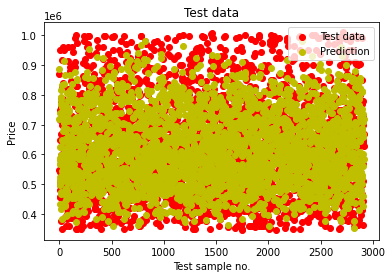

In [ ]:
plt.scatter(list(range(len(y_test))), y_test, c='r')
plt.scatter(list(range(len(y_forest_pred_test))), y_forest_pred_test, c='y')
plt.legend(['Test data', 'Prediction'])
plt.xlabel('Test sample no.')
plt.ylabel('Price')
plt.title('Test data')

In [ ]:
import xgboost as xgb

In [ ]:
xgb_regr = xgb.XGBRegressor(n_estimators = 150)
xgb_regr.fit(x_train_norm, y_train)

[13:58:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=150)

In [ ]:
# Predictions
y_xgb_pred_train = xgb_regr.predict(x_train_norm)
y_xgb_pred_test = xgb_regr.predict(x_test_norm)

In [ ]:
print('RF Regressor, train data RMSE: %.2f' % mean_squared_error(y_train, y_xgb_pred_train, squared=False))
print('RF Regressor, test data RMSE: %.2f' % mean_squared_error(y_test, y_xgb_pred_test, squared=False))

RF Regressor, train data RMSE: 108087.27
RF Regressor, test data RMSE: 111875.85


Text(0.5, 1.0, 'Test data')

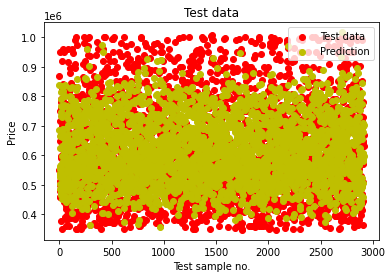

In [ ]:
plt.scatter(list(range(len(y_test))), y_test, c='r')
plt.scatter(list(range(len(y_xgb_pred_test))), y_xgb_pred_test, c='y')
plt.legend(['Test data', 'Prediction'])
plt.xlabel('Test sample no.')
plt.ylabel('Price')
plt.title('Test data')

In [ ]:
# Saving model
import pickle

pickle.dump(tree_regr, open('tree_regr.sav', 'wb'))

In [ ]:
rgr_tree = pickle.load(open('tree_regr.sav', 'rb'))

In [ ]:
rgr_tree.predict(x_test_norm)

array([727980.5       , 932054.6       , 544161.27160494, ...,
       578821.77884211, 679583.46      , 621906.0060241 ])